In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,7)

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df1 = df.drop(['area_type', 'availability', 'society'],axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 6)

In [6]:
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df1.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

In [8]:
df1.balcony.fillna(df1.balcony.median(), inplace=True)

In [9]:
df2 = df1.dropna()
df1.shape,df2.shape

((13320, 6), (13246, 6))

In [10]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2['bhk']

<ipython-input-11-308d62ecb508>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13246, dtype: int64

In [12]:
df3 = df2.drop(['size'], axis=1)
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3.total_sqft.apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [16]:
def sqft_converter(x):
    y = x.split('-')
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df3.total_sqft = df3.total_sqft.apply(sqft_converter)
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [18]:
df3.total_sqft.isna().sum()

46

In [19]:
df3.shape

(13246, 6)

In [20]:
df4 = df3.dropna()
df4.shape

(13200, 6)

In [21]:
df4.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [22]:
df4.location.nunique()

1298

In [23]:
df4.location = df4.location.apply(lambda x: x.strip())
df4.location.nunique()

C:\Users\7470\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


1287

In [24]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
house_count = df4.location.value_counts()
house_count

Whitefield                 533
Sarjapur  Road             392
Electronic City            304
Kanakpura Road             264
Thanisandra                235
                          ... 
Vinayaka Layout              1
Tilak Nagar                  1
CQAL LAYOUT C BLOCK          1
Bull Temple Road             1
Nagarbhavi  BDA Complex      1
Name: location, Length: 1287, dtype: int64

In [26]:
house_count[house_count<=10].value_counts().sum()

1047

In [27]:
house_count[house_count>10].value_counts().sum()

240

In [28]:
df4.location = df4.location.apply(lambda x: 'other' if x in house_count[house_count<=10] else x)

In [29]:
df4.location.nunique()

241

In [30]:
df5 = df4.copy()
df5.shape

(13200, 6)

In [31]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [32]:
df5['sqft_per_bhk'] = df5['total_sqft']/df5['bhk']
df5.head()

,location,total_sqft,bath,balcony,price,bhk,sqft_per_bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,528.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,650.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,480.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,507.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,600.0


In [33]:
df5.shape

(13200, 7)

In [34]:
df6 = df5[(df5['sqft_per_bhk']>250)&(df5['sqft_per_bhk']<2500)].drop(['sqft_per_bhk'], axis=1)
df6.shape

(12541, 6)

In [35]:
df6.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [36]:
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [37]:
df6['price_per_sqft'].describe()

count     12541.000000
mean       6341.076576
std        4189.806018
min         500.000000
25%        4217.391304
50%        5300.859599
75%        6954.887218
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
def remove_pps_outliers(df):
    final_df = pd.DataFrame()
    for loc_name, loc_df in df.groupby('location'):
        m = np.mean(loc_df.price_per_sqft)
        sd = np.std(loc_df.price_per_sqft)
        new_df = loc_df[(loc_df.price_per_sqft>(m-sd))&(loc_df.price_per_sqft<(m+sd))]
        final_df = pd.concat([final_df, new_df], ignore_index=True)
    return final_df

In [39]:
df6.shape

(12541, 7)

In [40]:
df7 = remove_pps_outliers(df6)
df7.shape

(10361, 7)

In [41]:
def scatter_plot(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price,label='2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='red', label='3 BHK')
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.legend()

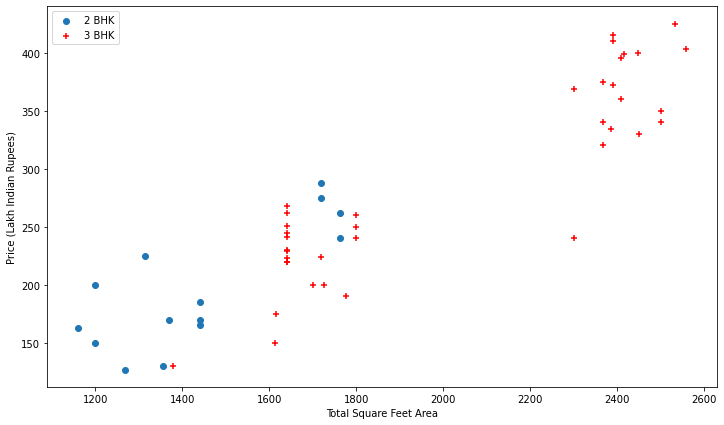

In [42]:
scatter_plot(df7, 'Rajaji Nagar')

In [43]:
# def remove_bhk_outlier(df):
#     new_df = pd.DataFrame()
#     for loc_name, loc_df in df.groupby('location'):
#         bhk_stats = {}
#         for bhk_n, bhk_df in loc_df.groupby('bhk'):
#             bhk_stats[bhk_n] = {
#                 'mean': np.mean(bhk_df.price_per_sqft),
#                 'std': np.std(bhk_df.price_per_sqft),
#                 'count': bhk_df.shape[0]
#             }
#         for bhk_n, bhk_df in loc_df.groupby('bhk'):
#             stats = bhk_stats.get(bhk_n-1)
#             if stats and stats['count']>5:
#                 new_df = pd.concat([new_df,bhk_df[bhk_df.price_per_sqft>stats['mean']]], ignore_index=True)
#     return new_df

In [44]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for loc_name, loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk_n, bhk_df in loc_df.groupby('bhk'):
            bhk_stats[bhk_n] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk_n, bhk_df in loc_df.groupby('bhk'):
            stats = bhk_stats.get(bhk_n-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis=0)

In [45]:
df7.shape

(10361, 7)

In [46]:
df8 = remove_bhk_outlier(df7)

In [47]:
df8.shape

(7380, 7)

In [48]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


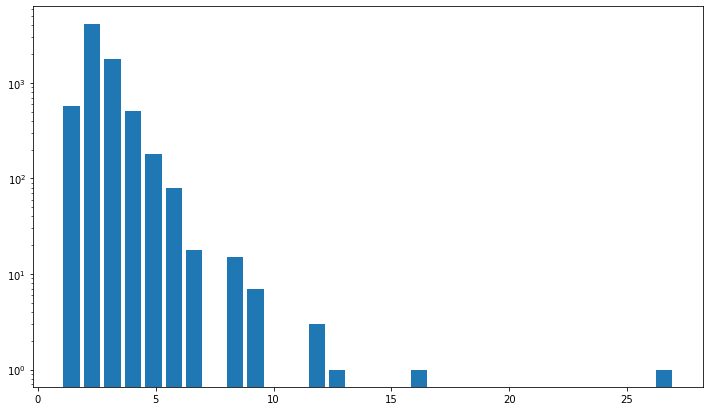

In [49]:
plt.hist(df8.bath, bins=30, rwidth=0.8)
plt.yscale('log')
plt.show()

In [50]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 27., 16., 13.])

In [51]:
df8.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 27, 16, 13],
      dtype=int64)

In [52]:
df9 = df8[df8.bath<=df8.bhk+2]
df9.shape

(7376, 7)

In [53]:
dummy = pd.get_dummies(df9.location)

In [54]:
df10 = pd.concat([df9,dummy], axis=1)
df10.drop(['location','price_per_sqft','1st Block Jayanagar'], axis=1, inplace=True)
df10.head()

,total_sqft,bath,balcony,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,1.0,428.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df10.shape

(7376, 245)

In [56]:
X = df10.drop(['price'], axis=1)
y = df10.price

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [59]:
def best_model_finder(X,y):
    algos = {
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'splitter': ['best','random']
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'selection' : ['cyclic', 'random'],
                'alpha': [1,2,3]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [60]:
best_model_finder(X,y)

C:\Users\7470\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\7470\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\7470\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "C:\Users\7470\anaconda3\lib\site-packages\scipy\linalg\basic.py", line 1221, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"


,model,best_score,best_params
0,linear_regression,0.814737,{'normalize': False}
1,decision_tree,0.751568,"{'criterion': 'mae', 'splitter': 'best'}"
2,lasso,0.689038,"{'alpha': 1, 'selection': 'cyclic'}"


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
# import pickle
# with open('Bangalore_house_price_predictor.pickle','wb') as f:
#     pickle.dump(lr,f)

In [64]:
# import json

# columns = {
#     'data_columns': [col.lower() for col in X.columns]
# }

# with open('columns.json','w') as f:
#     f.write(json.dumps(columns))

In [65]:
print(df5.location.unique())
data = []
data.append(str(input('Enter location name:')))
data.append(float(input('Enter square feet:')))
data.append(int(input('Enter number of bath:')))
data.append(int(input('Enter number of balcony:')))
data.append(int(input('Enter number of bhk:')))

def predict_price(data):    
    loc_index = np.where(X.columns==data[0])[0][0]

    x = np.zeros(len(X.columns))
    x[0] = data[1]
    x[1] = data[2]
    x[2] = data[3]
    x[3] = data[4]
    if loc_index >= 0:
        x[loc_index] = 1

    return round(lr.predict([x])[0],2)

print(predict_price(data),' lakh')

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Kaval Byrasandra' 'ISRO Layout' 'Garudachar Palya' 'EPIP Zone'
 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar' 'Domlur'
 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura' 'Nagarbhavi'
 'Devanahalli' 'Ramamurthy Nagar' 'Malleshwaram' 'Akshaya Nagar'
 'Shampura' 'Kadugodi' 'LB